<a href="https://colab.research.google.com/github/advapplab/sentiment_analysis_election_2022/blob/main/improved_Chiang_Ko_Tsai_unlabelled_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0 Init

In [1]:
!pip install datasets
!pip install transformers
!pip install --upgrade xlrd
!pip install huggingface_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 451 kB 30.1 MB/s 
     |████████████████████████████████| 182 kB 75.3 MB/s 
     |████████████████████████████████| 132 kB 72.7 MB/s 
     |████████████████████████████████| 212 kB 74.2 MB/s 
     |████████████████████████████████| 127 kB 76.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 12.9 MB/s 
     |████████████████████████████████| 7.6 MB 46.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 5.4 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.2.0
    Unins

In [2]:
#import our model from huggingface
number_classes = 2
model_tokenizer = "hfl/chinese-roberta-wwm-ext"

if number_classes == 2:
    model_classifier = "Jiabo/Roberta_Chinese_sentiment"
else:
    model_classifier = "owen198/weibo-wmmbert-6"


In [3]:
model_classifier

'Jiabo/Roberta_Chinese_sentiment'

#**柯文哲_before**

# 1. load and clean data

In [4]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/柯文哲_before.xlsx

--2022-12-19 10:17:54--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/%E6%9F%AF%E6%96%87%E5%93%B2_before.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217925 (213K) [application/octet-stream]
Saving to: ‘柯文哲_before.xlsx’

柯文哲_before.xlsx  100%[===================>] 212.82K  --.-KB/s    in 0.002s  

2022-12-19 10:17:55 (84.5 MB/s) - ‘柯文哲_before.xlsx’ saved [217925/217925]



In [5]:
import pandas as pd

In [6]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/柯文哲_before.xlsx')

testing_pd.rename(columns={'博文': 'text'},
          inplace=True, errors='raise')

testing_pd = testing_pd[['text']]

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [7]:
#dirty data
testing_pd

,text
0,【参选后与柯P切割？黄珊珊：政绩息息相关 没什么好切割】台北市副市长黄珊珊明日将以无党籍平民...
1,#关注台海# 湾湾冥进党不顾台海紧张情势拼选举，柯文哲怒呛: 把战争当游戏#消灭台独##解放...
2,【柯文哲点评仇恨值高 陈时中亏：是他对我仇恨值高】台北市长柯文哲昨接受专访谈及台北市长选举「...
3,冥进党不顾台海紧张情势拼选举，柯文哲怒呛:把战争当游戏#台湾# L泉州那些事儿的微博视频 ​
4,【#民进党不顾台海紧张情势拼选举# 柯文哲呛:把战争当游戏】 L台海网的微博视频 ​
...,...
611,学店仔笑死人。现在是柯文哲要选新竹市长？？ ​
612,【台湾特稿：首次参与台湾“九合一”选举 蓝绿夹缝中 白营不投降】台湾政治版图长期由蓝绿（国民...
613,#国台办称对团团病逝感到痛心和惋惜# 看看柯文哲这德行，他们不配！? O网页链接 ​
614,【柯文哲质疑竹市有不可告人之事 林智坚脸书长文反击】民众党新竹市长候选人高虹安助理费争议延烧...


In [8]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].re place(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[【|《*】|》]"
title_pattern_1 = "(?=【)(.*)(?<=】)"
title_pattern_2 = "(?=《)(.*)(?<=》)"
link_pattern="网页链接"
span_pattern='<span.*?>(.+?)</span>'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

In [9]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

,text
0,台北市副市长黄珊珊明日将以无党籍平民身份宣布参选台北市长，而传出市长柯文哲也有受邀出席参选记...
1,#关注台海# 湾湾冥进党不顾台海紧张情势拼选举，柯文哲怒呛: 把战争当游戏#消灭台独##解放...
2,台北市长柯文哲昨接受专访谈及台北市长选举「三脚督」，分析三人中只有民进党参选人陈时中仇恨值很...
3,冥进党不顾台海紧张情势拼选举，柯文哲怒呛:把战争当游戏#台湾# L泉州那些事儿的微博视频 ​
4,L台海网的微博视频 ​
...,...
611,学店仔笑死人。现在是柯文哲要选新竹市长？？ ​
612,台湾政治版图长期由蓝绿（国民党和民进党）瓜分，但也有异军突起的例外。八年前无党籍的医学教授柯...
613,#国台办称对团团病逝感到痛心和惋惜# 看看柯文哲这德行，他们不配！? O ​
614,民众党新竹市长候选人高虹安助理费争议延烧，台北市长柯文哲为护高虹安，质疑新竹市有何不可告人之...


## 1-2 Tokenization

In [10]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)}

weibo_ds = DatasetDict(weibo_dict)

In [11]:
from transformers import AutoTokenizer

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

Downloading:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/689 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/110k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/269k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [13]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [14]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [15]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

Downloading:   0%|          | 0.00/958 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/409M [00:00<?, ?B/s]

In [16]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

<ipython-input-16-e1ee7db0da93>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [17]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

In [18]:
import numpy as np

#prediction results


In [19]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 616
  Batch size = 8


In [20]:
pred

PredictionOutput(predictions=array([[-2.9534392,  2.2176182],
       [ 2.0387948, -1.3026719],
       [ 1.7586662, -1.0337471],
       ...,
       [ 3.3962717, -2.7548654],
       [ 2.9904263, -2.3047268],
       [ 3.0871537, -2.4030924]], dtype=float32), label_ids=None, metrics={'test_runtime': 21.4639, 'test_samples_per_second': 28.699, 'test_steps_per_second': 3.587})

In [21]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [22]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [23]:
#final table
testing_pd

,text,pred
0,台北市副市长黄珊珊明日将以无党籍平民身份宣布参选台北市长，而传出市长柯文哲也有受邀出席参选记...,1
1,#关注台海# 湾湾冥进党不顾台海紧张情势拼选举，柯文哲怒呛: 把战争当游戏#消灭台独##解放...,0
2,台北市长柯文哲昨接受专访谈及台北市长选举「三脚督」，分析三人中只有民进党参选人陈时中仇恨值很...,0
3,冥进党不顾台海紧张情势拼选举，柯文哲怒呛:把战争当游戏#台湾# L泉州那些事儿的微博视频 ​,0
4,L台海网的微博视频 ​,1
...,...,...
611,学店仔笑死人。现在是柯文哲要选新竹市长？？ ​,1
612,台湾政治版图长期由蓝绿（国民党和民进党）瓜分，但也有异军突起的例外。八年前无党籍的医学教授柯...,1
613,#国台办称对团团病逝感到痛心和惋惜# 看看柯文哲这德行，他们不配！? O ​,0
614,民众党新竹市长候选人高虹安助理费争议延烧，台北市长柯文哲为护高虹安，质疑新竹市有何不可告人之...,0


# graphs

In [24]:
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
print(count0, count1)

373 243


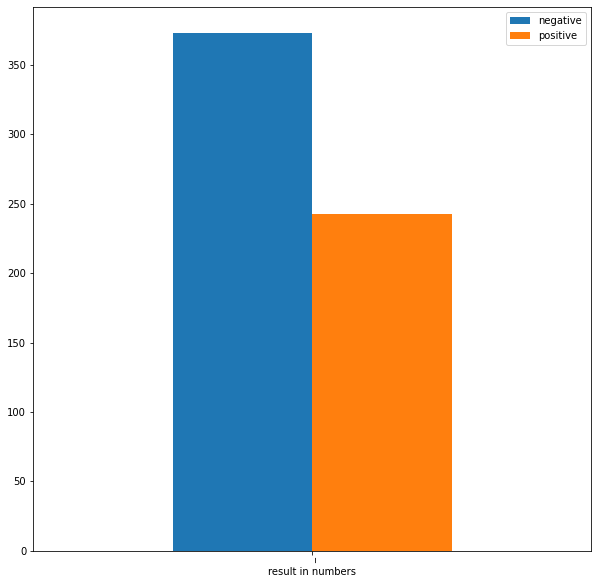

In [25]:
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

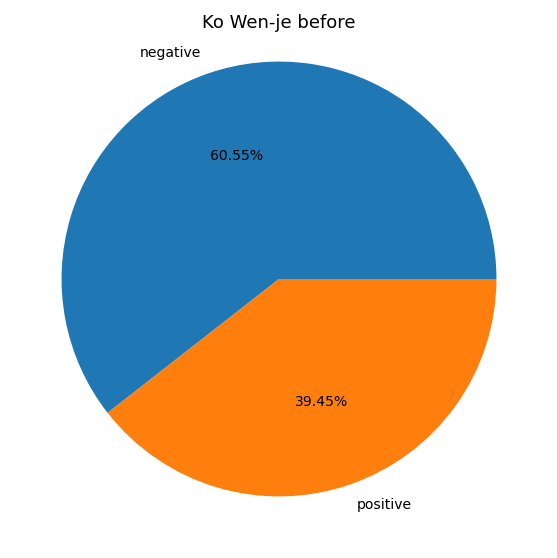

In [26]:
#def Percentage(num1, num2):
#    return num1 / (num1 + num2) * 100
    
#print(Percentage(count0, count1))
#print(Percentage(215, 401))

#plot in percentage. Remember, 0 = negative, 1 = positive
def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Ko Wen-je before', fontsize=18, y=0.95);

#**柯文哲_after**

# 1. load and clean data

In [27]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/柯文哲_after.xlsx

--2022-12-19 10:18:57--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/%E6%9F%AF%E6%96%87%E5%93%B2_after.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55532 (54K) [application/octet-stream]
Saving to: ‘柯文哲_after.xlsx’

柯文哲_after.xlsx   100%[===================>]  54.23K  --.-KB/s    in 0.001s  

2022-12-19 10:18:57 (74.6 MB/s) - ‘柯文哲_after.xlsx’ saved [55532/55532]



In [28]:
import pandas as pd

In [29]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/柯文哲_after.xlsx')

testing_pd.rename(columns={'博文': 'text'},
          inplace=True, errors='raise')

testing_pd = testing_pd[['text']]

In [30]:
#dirty data
testing_pd

,text
0,公務員是服務人民不是管理人民因為老百姓繳錢給政府是叫政府來服務他不是叫政府來管他難道你會繳一...
1,訂了明天的文華東方辦開票趴，希望結果是好的，彌補我眼瞎投了柯文哲兩次的錯誤。 ​
2,還有35分鐘，我到底要不要去投呢？藍綠都討厭，想投柯文哲民眾黨，可是想想，會不會又是一個怪獸...
3,这年头整天自我感动的感性废物疯批好多。前些天团团在台北动物园安乐死了。看到熊猫粉中的脑残还真...
4,【柯建铭选前脸书道歉 高虹安：应向全台、全新竹市民道歉】立委高金素梅25日中午到竹市与民众党...
...,...
168,支持柯文哲的观点武统 L武力统一的微博视频 ​
169,民进党一再操弄“抗中保台”牌 柯文哲怒呛：干脆把ECFA停掉 L中国台湾网的微博视频 ​
170,民进党禁抖音 柯文哲吐槽：干脆停掉ECFA #今日说海峡##台海时刻# L今日海峡的微博视频 ​
171,冥进洞一再操弄“抗中保台”牌。柯文哲怒呛。 L观蛙有语的微博视频 ​


In [31]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].re place(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[【|《*】|》]"
title_pattern_1 = "(?=【)(.*)(?<=】)"
title_pattern_2 = "(?=《)(.*)(?<=》)"
link_pattern="网页链接"
span_pattern='<span.*?>(.+?)</span>'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

In [32]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

,text
0,公務員是服務人民不是管理人民因為老百姓繳錢給政府是叫政府來服務他不是叫政府來管他難道你會繳一...
1,訂了明天的文華東方辦開票趴，希望結果是好的，彌補我眼瞎投了柯文哲兩次的錯誤。 ​
2,還有35分鐘，我到底要不要去投呢？藍綠都討厭，想投柯文哲民眾黨，可是想想，會不會又是一個怪獸...
3,这年头整天自我感动的感性废物疯批好多。前些天团团在台北动物园安乐死了。看到熊猫粉中的脑残还真...
4,立委高金素梅25日中午到竹市与民众党新竹市长候选人高虹安合体车扫，针对立委柯建铭在脸书对柯文...
...,...
168,支持柯文哲的观点武统 L武力统一的微博视频 ​
169,民进党一再操弄“抗中保台”牌 柯文哲怒呛：干脆把ECFA停掉 L中国台湾网的微博视频 ​
170,民进党禁抖音 柯文哲吐槽：干脆停掉ECFA #今日说海峡##台海时刻# L今日海峡的微博视频 ​
171,冥进洞一再操弄“抗中保台”牌。柯文哲怒呛。 L观蛙有语的微博视频 ​


## 1-2 Tokenization

In [33]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)}

weibo_ds = DatasetDict(weibo_dict)

In [34]:
from transformers import AutoTokenizer

In [35]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--hfl--chinese-roberta-wwm-ext/snapshots/5c58d0b8ec1d9014354d691c538661bf00bfdb44/config.json
Model config BertConfig {
  "_name_or_path": "hfl/chinese-roberta-wwm-ext",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.

In [36]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [37]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [38]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Jiabo--Roberta_Chinese_sentiment/snapshots/d6228f03fa2d008b7143c7a3b914127d2576e9dd/config.json
Model config BertConfig {
  "_name_or_path": "Jiabo/Roberta_Chinese_sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "problem

In [39]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [40]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [41]:
import numpy as np

#prediction results


In [42]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 173
  Batch size = 8


In [43]:
pred

PredictionOutput(predictions=array([[ 3.0962293 , -2.4429011 ],
       [-2.7002265 ,  2.0313435 ],
       [ 2.234844  , -1.4702818 ],
       [ 2.490893  , -1.7567905 ],
       [ 2.157246  , -1.4033804 ],
       [-3.0083468 ,  2.258788  ],
       [-2.2449493 ,  1.3423753 ],
       [ 1.8859787 , -1.1253293 ],
       [-3.1876128 ,  2.477768  ],
       [ 3.9378273 , -3.3391054 ],
       [ 1.3487123 , -0.6672668 ],
       [ 1.842534  , -1.106549  ],
       [-2.235947  ,  1.301774  ],
       [-2.5823357 ,  1.7168195 ],
       [-2.6658564 ,  1.887025  ],
       [-1.6796958 ,  1.2150894 ],
       [-2.4038332 ,  1.531057  ],
       [-1.740525  ,  1.0077009 ],
       [ 1.7811736 , -1.091929  ],
       [ 3.8641672 , -3.2877593 ],
       [ 2.5419688 , -1.7849901 ],
       [-2.165592  ,  1.2986594 ],
       [ 0.12059586,  0.07223152],
       [-2.074888  ,  1.2284485 ],
       [-2.0973141 ,  1.2160993 ],
       [-3.444588  ,  2.771671  ],
       [ 2.5162885 , -1.7414587 ],
       [-2.914447  ,  2.17

In [44]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1])

In [45]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [46]:
#final table
testing_pd

,text,pred
0,公務員是服務人民不是管理人民因為老百姓繳錢給政府是叫政府來服務他不是叫政府來管他難道你會繳一...,0
1,訂了明天的文華東方辦開票趴，希望結果是好的，彌補我眼瞎投了柯文哲兩次的錯誤。 ​,1
2,還有35分鐘，我到底要不要去投呢？藍綠都討厭，想投柯文哲民眾黨，可是想想，會不會又是一個怪獸...,0
3,这年头整天自我感动的感性废物疯批好多。前些天团团在台北动物园安乐死了。看到熊猫粉中的脑残还真...,0
4,立委高金素梅25日中午到竹市与民众党新竹市长候选人高虹安合体车扫，针对立委柯建铭在脸书对柯文...,0
...,...,...
168,支持柯文哲的观点武统 L武力统一的微博视频 ​,1
169,民进党一再操弄“抗中保台”牌 柯文哲怒呛：干脆把ECFA停掉 L中国台湾网的微博视频 ​,0
170,民进党禁抖音 柯文哲吐槽：干脆停掉ECFA #今日说海峡##台海时刻# L今日海峡的微博视频 ​,0
171,冥进洞一再操弄“抗中保台”牌。柯文哲怒呛。 L观蛙有语的微博视频 ​,0


# graphs

In [47]:
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
print(count0, count1)

78 95


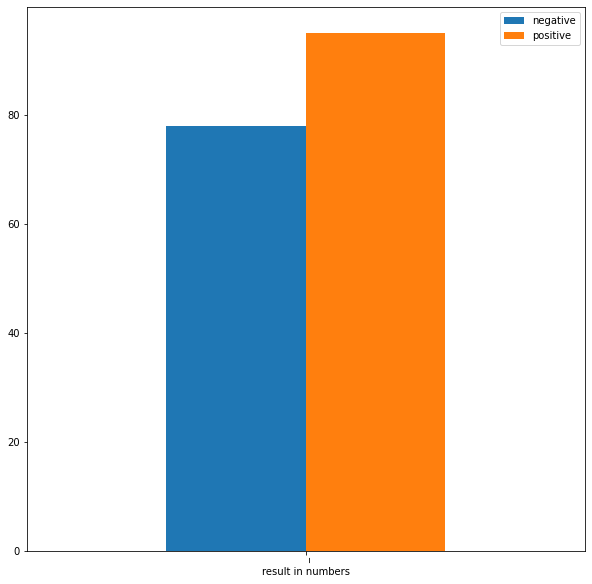

In [48]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

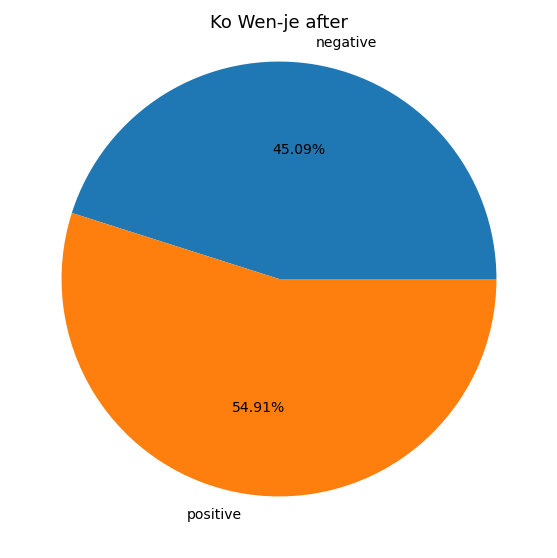

In [49]:
#def Percentage(num1, num2):
#    return num1 / (num1 + num2) * 100
    
#print(Percentage(count0, count1))
#print(Percentage(count1, count0))

def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

#plot in percentage. Remember, 0 = negative, 1 = positive
per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Ko Wen-je after', fontsize=18, y=0.95);

#**蔡英文_before**

# 1. load and clean data

In [50]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/蔡英文_before.xlsx

--2022-12-19 10:19:08--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/%E8%94%A1%E8%8B%B1%E6%96%87_before.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62145 (61K) [application/octet-stream]
Saving to: ‘蔡英文_before.xlsx’

蔡英文_before.xlsx  100%[===================>]  60.69K  --.-KB/s    in 0.001s  

2022-12-19 10:19:08 (61.1 MB/s) - ‘蔡英文_before.xlsx’ saved [62145/62145]



In [51]:
import pandas as pd

In [52]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/蔡英文_before.xlsx')

testing_pd.rename(columns={'博文': 'text'},
          inplace=True, errors='raise')

testing_pd = testing_pd[['text']]

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [53]:
#dirty data
testing_pd

,text
0,声光伴读《蔡英文撑手Joke只系吹水？香港移民「台湾梦」破碎》作者：只抽侠移居台湾的YouT...
1,粤读博览《台湾特区大势所趋！蔡英文太阿Q随时仆直！》作者：说书人当地有记者问拜登：「乌克兰现...
2,【台媒：綠營“大佬”相繼“狂倒戈”，前“立委”也出面批評民進黨】據台灣中時新聞網16日報道，...
3,【台积电创办人张忠谋第六次代表台湾出席APEC】蔡英文20日宣布由现年91岁的台积电创办人张...
4,#湾湾发电姬# 【台北没戏了！#蔡英文心腹捅出大娄子# ，疫苗黑幕败露成民进党噩梦】陈时中的...
...,...
181,【悼念拜登的狗 对“团团”不闻不问 #马英九轰蔡英文“太过分”#】#赠台大熊猫“团团”不...
182,【今日網圖】「小英」技窮？ //蔡英文獨孤一味搞政治，台灣民眾仲咁蠢想繼續捱窮咩？// ​
183,【Residentes de Taiwan lloran la partida de Tua...
184,【熊猫旅台14年，不如拜登的狗？】大陆赠台大熊猫“团团”离世，岛内民众和许多政治人物都相当不...


In [54]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].re place(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[【|《*】|》]"
title_pattern_1 = "(?=【)(.*)(?<=】)"
title_pattern_2 = "(?=《)(.*)(?<=》)"
link_pattern="网页链接"
span_pattern='<span.*?>(.+?)</span>'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

In [55]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

,text
0,声光伴读作者：只抽侠移居台湾的YouTuber拍片，用亲身经历告诉大家：移民台湾撞板多个食饭...
1,粤读博览作者：说书人当地有记者问拜登：「乌克兰现在真的必须割地才能换取和平吗？」拜登如此回应...
2,據台灣中時新聞網16日報道，台民進黨近期諸多爭議引發討論，針對民進黨前主席許信良胞弟、前“立...
3,蔡英文20日宣布由现年91岁的台积电创办人张忠谋担任代表，出席11月18日至19日在泰国举行...
4,#湾湾发电姬# 陈时中的仇恨值为什么这么高？他自己说不知道，我们就来帮他知道。台湾老百姓在防...
...,...
181,#赠台大熊猫“团团”不幸离世# L台海网的微博视频 ​
182,「小英」技窮？ //蔡英文獨孤一味搞政治，台灣民眾仲咁蠢想繼續捱窮咩？// ​
183,Residentes de ambos lados del estrecho de Taiw...
184,大陆赠台大熊猫“团团”离世，岛内民众和许多政治人物都相当不舍。但蔡英文和其他民进党政客几乎都...


## 1-2 Tokenization

In [56]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)
              }

weibo_ds = DatasetDict(weibo_dict)

In [57]:
from transformers import AutoTokenizer

In [58]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--hfl--chinese-roberta-wwm-ext/snapshots/5c58d0b8ec1d9014354d691c538661bf00bfdb44/config.json
Model config BertConfig {
  "_name_or_path": "hfl/chinese-roberta-wwm-ext",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.

In [59]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [60]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [61]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Jiabo--Roberta_Chinese_sentiment/snapshots/d6228f03fa2d008b7143c7a3b914127d2576e9dd/config.json
Model config BertConfig {
  "_name_or_path": "Jiabo/Roberta_Chinese_sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "problem

In [62]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [63]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [64]:
import numpy as np

#prediction results


In [65]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 186
  Batch size = 8


In [66]:
pred

PredictionOutput(predictions=array([[ 2.4447746 , -1.6826247 ],
       [ 2.3749285 , -1.6262561 ],
       [ 3.139464  , -2.4952734 ],
       [-2.909094  ,  2.1618102 ],
       [ 3.6102245 , -3.0293133 ],
       [ 2.0606573 , -1.2680036 ],
       [-2.871472  ,  2.118858  ],
       [ 2.633325  , -1.8860667 ],
       [ 1.9478648 , -1.1661887 ],
       [ 2.4779663 , -1.7339672 ],
       [ 2.6549816 , -1.926972  ],
       [-2.4156516 ,  1.5570391 ],
       [-2.6321847 ,  1.8376536 ],
       [-3.3357701 ,  2.6460981 ],
       [-1.2871481 ,  1.1352278 ],
       [ 2.7113264 , -1.9775584 ],
       [ 2.699778  , -1.9562894 ],
       [ 1.4262134 , -0.78145987],
       [ 3.4693182 , -2.8864646 ],
       [ 1.7891334 , -1.0207033 ],
       [ 0.8881073 , -0.57488245],
       [ 1.6966345 , -0.9455452 ],
       [ 3.3824923 , -2.7815084 ],
       [-2.248505  ,  1.2828279 ],
       [ 3.0341392 , -2.3276317 ],
       [-0.9249023 ,  0.86108655],
       [ 2.3341308 , -1.5860868 ],
       [ 2.241998  , -1.49

In [67]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [68]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [69]:
#final table
testing_pd

,text,pred
0,声光伴读作者：只抽侠移居台湾的YouTuber拍片，用亲身经历告诉大家：移民台湾撞板多个食饭...,0
1,粤读博览作者：说书人当地有记者问拜登：「乌克兰现在真的必须割地才能换取和平吗？」拜登如此回应...,0
2,據台灣中時新聞網16日報道，台民進黨近期諸多爭議引發討論，針對民進黨前主席許信良胞弟、前“立...,0
3,蔡英文20日宣布由现年91岁的台积电创办人张忠谋担任代表，出席11月18日至19日在泰国举行...,1
4,#湾湾发电姬# 陈时中的仇恨值为什么这么高？他自己说不知道，我们就来帮他知道。台湾老百姓在防...,0
...,...,...
181,#赠台大熊猫“团团”不幸离世# L台海网的微博视频 ​,0
182,「小英」技窮？ //蔡英文獨孤一味搞政治，台灣民眾仲咁蠢想繼續捱窮咩？// ​,0
183,Residentes de ambos lados del estrecho de Taiw...,0
184,大陆赠台大熊猫“团团”离世，岛内民众和许多政治人物都相当不舍。但蔡英文和其他民进党政客几乎都...,0


# graphs

In [70]:
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
print(count0, count1)

98 88


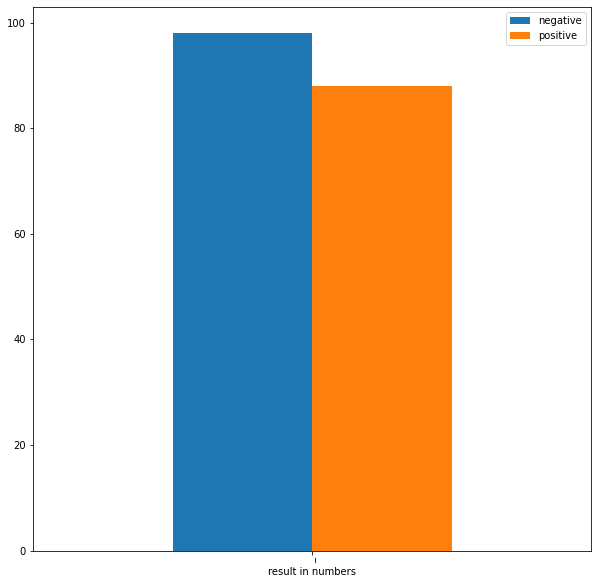

In [71]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

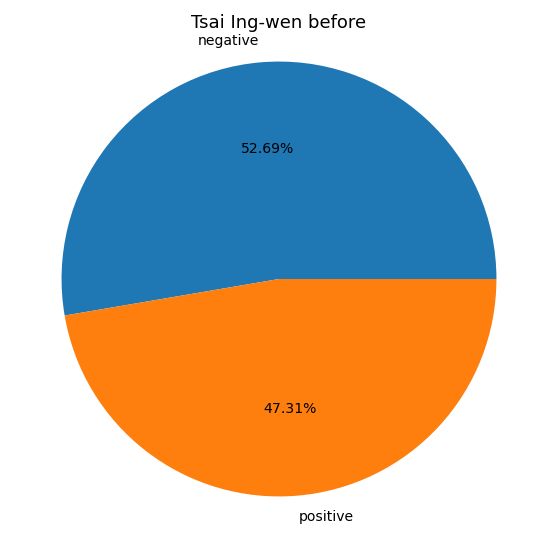

In [72]:
#def Percentage(num1, num2):
#    return num1 / (num1 + num2) * 100
    
#print(Percentage(count0, count1))
#print(Percentage(count1, count0))

def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

#plot in percentage. Remember, 0 = negative, 1 = positive
per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Tsai Ing-wen before', fontsize=18, y=0.95);

#**蔡英文_after**

# 1. load and clean data

In [73]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/蔡英文_after.xlsx

--2022-12-19 10:19:19--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/%E8%94%A1%E8%8B%B1%E6%96%87_after.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 97732 (95K) [application/octet-stream]
Saving to: ‘蔡英文_after.xlsx’

蔡英文_after.xlsx   100%[===================>]  95.44K  --.-KB/s    in 0.002s  

2022-12-19 10:19:19 (49.3 MB/s) - ‘蔡英文_after.xlsx’ saved [97732/97732]



In [74]:
import pandas as pd

In [75]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/蔡英文_after.xlsx')

testing_pd.rename(columns={'博文': 'text'},
          inplace=True, errors='raise')

testing_pd = testing_pd[['text']]

In [76]:
#dirty data
testing_pd

,text
0,【#台湾“九合一”选举#今登场 朱立伦斥民进党“由绿转黑”】台湾的“九合一”选举26日投票，...
1,蔡英文宣布辞去民进党主席职务。 #蔡英文宣布辞去民进党主席职务##蔡英文辞去民进党主席职务...
2,【#蔡英文辞去民进党主席职务#】
3,【台湾地区领导人辞去执政党主席职务】据台湾中央社报道，台湾地区行政长官蔡英文在市政选举失败后...
4,【国台办发言人就台湾地区“九合一”选举结果答记者问】国台办发言人朱凤莲26日晚就台湾地区“九...
...,...
374,#大陆正以实际行动要求台企落实一中原则#【刘和平：大陆以实际行动要求台湾切实遵循“九二共识”...
375,【台內務部門“重賞加速去蔣化” 賴士葆諷： 蔡英文當局豬隊友】據台灣“中時新聞網”報道，台灣...
376,【苏贞昌恐参选2024？港媒爆一种可能性】据台湾“中时新闻网”报道，民进党在台湾地区“九合一...
377,#台头闻# 蔡英文当局这事闹大了！台湾最新民调显示六成民众不满 L中国台湾网的微博视频 ​


In [77]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].re place(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[【|《*】|》]"
title_pattern_1 = "(?=【)(.*)(?<=】)"
title_pattern_2 = "(?=《)(.*)(?<=》)"
link_pattern="网页链接"
span_pattern='<span.*?>(.+?)</span>'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

In [78]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

,text
0,台湾的“九合一”选举26日投票，蓝绿阵营25日尽最后努力拉票。台湾地区领导人蔡英文到多个县市...
1,蔡英文宣布辞去民进党主席职务。 #蔡英文宣布辞去民进党主席职务##蔡英文辞去民进党主席职务...
2,据台湾中央社报道，台湾地区行政长官蔡英文在市政选举失败后于周六辞去执政的民进党主席一职。O台...
3,国台办发言人朱凤莲26日晚就台湾地区“九合一”选举结果应询表示，我们注意到这次选举的结果。这...
4,#蔡英文辞去民进党主席职务#据新华社消息：11月26日晚间，蔡英文宣布辞去民进党主席职务，以...
...,...
368,#大陆正以实际行动要求台企落实一中原则#继八月份暂停两千多项台湾产品进口之后，大陆海关再度暂...
369,據台灣“中時新聞網”報道，台灣所謂“促進轉型正義委員會”(“促轉會”)任期屆滿後，相關工作分...
370,据台湾“中时新闻网”报道，民进党在台湾地区“九合一”选举大败后，台当局行政部门负责人苏贞昌的...
371,#台头闻# 蔡英文当局这事闹大了！台湾最新民调显示六成民众不满 L中国台湾网的微博视频 ​


## 1-2 Tokenization

In [79]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)
              }

weibo_ds = DatasetDict(weibo_dict)

In [80]:
from transformers import AutoTokenizer

In [81]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--hfl--chinese-roberta-wwm-ext/snapshots/5c58d0b8ec1d9014354d691c538661bf00bfdb44/config.json
Model config BertConfig {
  "_name_or_path": "hfl/chinese-roberta-wwm-ext",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.

In [82]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [83]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [84]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Jiabo--Roberta_Chinese_sentiment/snapshots/d6228f03fa2d008b7143c7a3b914127d2576e9dd/config.json
Model config BertConfig {
  "_name_or_path": "Jiabo/Roberta_Chinese_sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "problem

In [85]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [86]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [87]:
import numpy as np

#prediction results


In [88]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 373
  Batch size = 8


In [89]:
pred

PredictionOutput(predictions=array([[ 2.0481474 , -1.3319448 ],
       [ 1.7881882 , -1.1066775 ],
       [ 3.1734343 , -2.5227885 ],
       [-3.4764705 ,  2.8503737 ],
       [ 1.8272774 , -1.1472372 ],
       [ 1.95364   , -1.2312815 ],
       [-2.9692032 ,  2.257079  ],
       [-3.0211382 ,  2.3028824 ],
       [-3.0211382 ,  2.3028824 ],
       [ 1.0464959 , -0.5538824 ],
       [ 2.7152517 , -1.9778318 ],
       [ 3.0494974 , -2.3635857 ],
       [ 1.9203963 , -1.1992489 ],
       [ 1.2746607 , -0.7000881 ],
       [ 1.2746607 , -0.7000881 ],
       [ 1.9203963 , -1.1992489 ],
       [ 1.95364   , -1.2312815 ],
       [-0.5700456 ,  0.5247015 ],
       [ 1.9760041 , -1.2155436 ],
       [-1.0902462 ,  0.99945086],
       [-0.18001734,  0.2003326 ],
       [ 1.8660553 , -1.1501383 ],
       [ 1.7946512 , -1.0991108 ],
       [ 2.0250862 , -1.2944219 ],
       [ 2.3815396 , -1.6509622 ],
       [ 1.95364   , -1.2312815 ],
       [ 1.849156  , -1.139161  ],
       [ 1.9278681 , -1.19

In [90]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [91]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [92]:
#final table
testing_pd

,text,pred
0,台湾的“九合一”选举26日投票，蓝绿阵营25日尽最后努力拉票。台湾地区领导人蔡英文到多个县市...,0
1,蔡英文宣布辞去民进党主席职务。 #蔡英文宣布辞去民进党主席职务##蔡英文辞去民进党主席职务...,0
2,据台湾中央社报道，台湾地区行政长官蔡英文在市政选举失败后于周六辞去执政的民进党主席一职。O台...,0
3,国台办发言人朱凤莲26日晚就台湾地区“九合一”选举结果应询表示，我们注意到这次选举的结果。这...,1
4,#蔡英文辞去民进党主席职务#据新华社消息：11月26日晚间，蔡英文宣布辞去民进党主席职务，以...,0
...,...,...
368,#大陆正以实际行动要求台企落实一中原则#继八月份暂停两千多项台湾产品进口之后，大陆海关再度暂...,0
369,據台灣“中時新聞網”報道，台灣所謂“促進轉型正義委員會”(“促轉會”)任期屆滿後，相關工作分...,1
370,据台湾“中时新闻网”报道，民进党在台湾地区“九合一”选举大败后，台当局行政部门负责人苏贞昌的...,1
371,#台头闻# 蔡英文当局这事闹大了！台湾最新民调显示六成民众不满 L中国台湾网的微博视频 ​,0


# graphs

In [93]:
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
print(count0, count1)

306 67


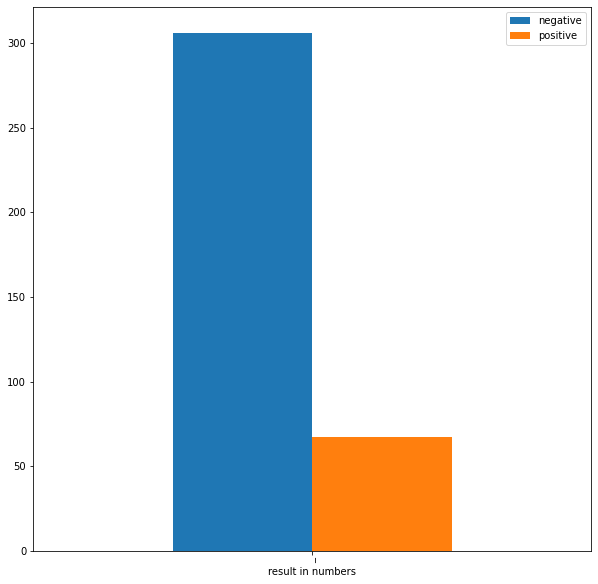

In [94]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

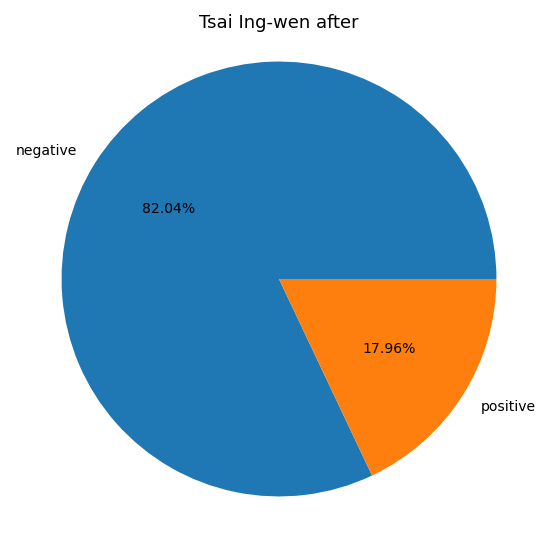

In [95]:
#def Percentage(num1, num2):
#    return num1 / (num1 + num2) * 100
    
#print(Percentage(count0, count1))
#print(Percentage(count1, count0))

def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

#plot in percentage. Remember, 0 = negative, 1 = positive
per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Tsai Ing-wen after', fontsize=18, y=0.95);

#**Chiang before**

# 1. load and clean data

In [96]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/Chiang_before.xlsx

--2022-12-19 10:19:36--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/Chiang_before.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209228 (204K) [application/octet-stream]
Saving to: ‘Chiang_before.xlsx’

Chiang_before.xlsx  100%[===================>] 204.32K  --.-KB/s    in 0.003s  

2022-12-19 10:19:36 (64.6 MB/s) - ‘Chiang_before.xlsx’ saved [209228/209228]



In [97]:
import pandas as pd

In [98]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/Chiang_before.xlsx')

testing_pd.rename(columns={'博文': 'text'},
          inplace=True, errors='raise')

testing_pd = testing_pd[['text']]

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [99]:
#dirty data
testing_pd

,text
0,【不只徐巧芯被泼脏水！绿侧翼抹黑高虹安手段曝光 惊人4字现形】9日绿营侧翼流传一份伪造文件，...
1,就说七伤拳嘛并且搞了半天好像只有蒋万安一个人辞职，同党和别党立委都不辞，噗嗤。 ​
2,【台北市长民调跌破眼镜！网一看酸爆陈时中：笑死人】距离九合一选举投票日不到20天，中华亚太菁...
3,最后预言一下，本月26日台湾省九合一大选可能出现的选举结果。（此次选举会影响未来两岸关系发展...
4,台北民调！蒋万安29.8%领先，蒋笃定、黄超车，陈哭哭，蔡咋办？ - 今日头条O网页链接 ​
...,...
785,【台北市长选举民调曝光 3人差距小选情白热化】台北市长选战开打，若由中国国民党推出的“立委”...
786,【台北市长选情最新民调曝光 网惊呼：死忠的这么多】拉锯战！TVBS民调中心昨(29日)发布《...
787,喜猪妹才会投陈时台吧，通讯录当然选蒋万安啊。 ​
788,最新民調，蔣萬安褲暫時領先 ​


In [100]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].re place(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[【|《*】|》]"
title_pattern_1 = "(?=【)(.*)(?<=】)"
title_pattern_2 = "(?=《)(.*)(?<=》)"
link_pattern="网页链接"
span_pattern='<span.*?>(.+?)</span>'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

In [101]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

,text
0,9日绿营侧翼流传一份伪造文件，指称国民党计划找狗仔跟拍县市长候选人行程，重点针对“黑金、贿选...
1,就说七伤拳嘛并且搞了半天好像只有蒋万安一个人辞职，同党和别党立委都不辞，噗嗤。 ​
2,距离九合一选举投票日不到20天，中华亚太菁英交流协会10日公布台北市长选举最新民调，民进党台...
3,最后预言一下，本月26日台湾省九合一大选可能出现的选举结果。（此次选举会影响未来两岸关系发展...
4,台北民调！蒋万安29.8%领先，蒋笃定、黄超车，陈哭哭，蔡咋办？ - 今日头条O ​
...,...
785,台北市长选战开打，若由中国国民党推出的“立委”蒋万安、民进党征召的前“卫福部长”陈时中及台北...
786,拉锯战！TVBS民调中心昨(29日)发布报告，国民党参选人蒋万安支持度微降至36%，刚辞职的...
787,喜猪妹才会投陈时台吧，通讯录当然选蒋万安啊。 ​
788,最新民調，蔣萬安褲暫時領先 ​


## 1-2 Tokenization

In [102]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)
              }

weibo_ds = DatasetDict(weibo_dict)

In [103]:
from transformers import AutoTokenizer

In [104]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--hfl--chinese-roberta-wwm-ext/snapshots/5c58d0b8ec1d9014354d691c538661bf00bfdb44/config.json
Model config BertConfig {
  "_name_or_path": "hfl/chinese-roberta-wwm-ext",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.

In [105]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [106]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [107]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Jiabo--Roberta_Chinese_sentiment/snapshots/d6228f03fa2d008b7143c7a3b914127d2576e9dd/config.json
Model config BertConfig {
  "_name_or_path": "Jiabo/Roberta_Chinese_sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "problem

In [108]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [109]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [110]:
import numpy as np

#prediction results


In [111]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 790
  Batch size = 8


In [112]:
pred

PredictionOutput(predictions=array([[ 3.5486097, -2.9753957],
       [ 3.6657896, -3.075826 ],
       [-1.9046147,  1.1120082],
       ...,
       [-1.8381772,  1.2277651],
       [-2.1320045,  1.4388957],
       [-1.8674968,  1.2904526]], dtype=float32), label_ids=None, metrics={'test_runtime': 25.0217, 'test_samples_per_second': 31.573, 'test_steps_per_second': 3.957})

In [113]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [114]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [115]:
#final table
testing_pd

,text,pred
0,9日绿营侧翼流传一份伪造文件，指称国民党计划找狗仔跟拍县市长候选人行程，重点针对“黑金、贿选...,0
1,就说七伤拳嘛并且搞了半天好像只有蒋万安一个人辞职，同党和别党立委都不辞，噗嗤。 ​,0
2,距离九合一选举投票日不到20天，中华亚太菁英交流协会10日公布台北市长选举最新民调，民进党台...,1
3,最后预言一下，本月26日台湾省九合一大选可能出现的选举结果。（此次选举会影响未来两岸关系发展...,1
4,台北民调！蒋万安29.8%领先，蒋笃定、黄超车，陈哭哭，蔡咋办？ - 今日头条O ​,0
...,...,...
785,台北市长选战开打，若由中国国民党推出的“立委”蒋万安、民进党征召的前“卫福部长”陈时中及台北...,0
786,拉锯战！TVBS民调中心昨(29日)发布报告，国民党参选人蒋万安支持度微降至36%，刚辞职的...,1
787,喜猪妹才会投陈时台吧，通讯录当然选蒋万安啊。 ​,1
788,最新民調，蔣萬安褲暫時領先 ​,1


# graphs

In [116]:
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
print(count0, count1)

485 305


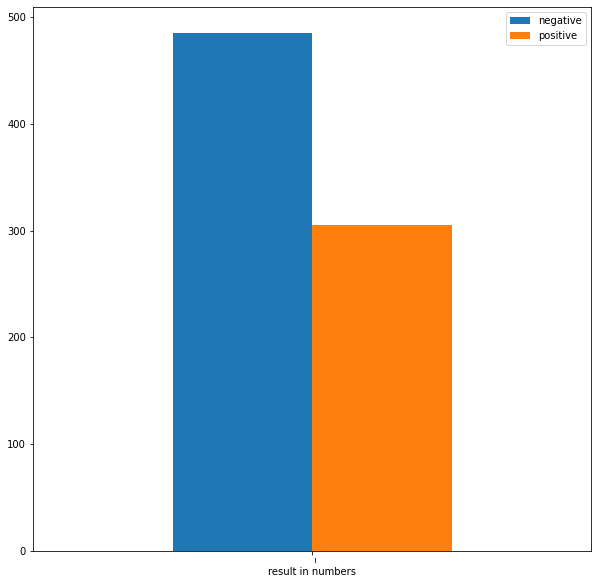

In [117]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

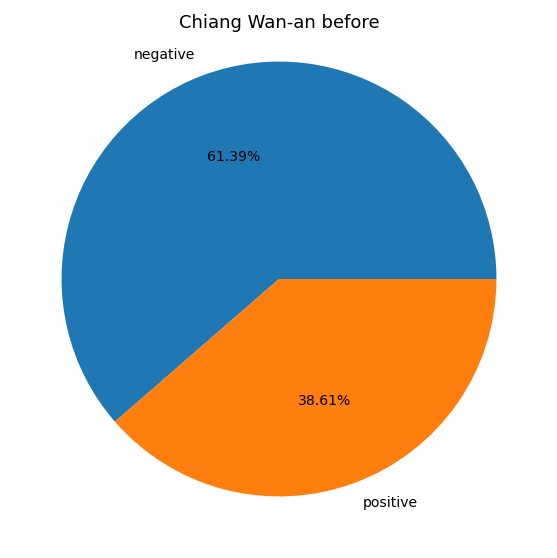

In [118]:
#def Percentage(num1, num2):
#    return num1 / (num1 + num2) * 100
    
#print(Percentage(count0, count1))
#print(Percentage(count1, count0))

def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

#plot in percentage. Remember, 0 = negative, 1 = positive
per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Chiang Wan-an before', fontsize=18, y=0.95);

#**Chiang_after**

# 1. load and clean data

In [119]:
#insert new xlsx file here
! wget -nc https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/Chiang_after.xlsx

--2022-12-19 10:20:07--  https://raw.githubusercontent.com/advapplab/sentiment_analysis_election_2022/main/data/challange/Chiang_after.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 129986 (127K) [application/octet-stream]
Saving to: ‘Chiang_after.xlsx’

Chiang_after.xlsx   100%[===================>] 126.94K  --.-KB/s    in 0.002s  

2022-12-19 10:20:07 (80.3 MB/s) - ‘Chiang_after.xlsx’ saved [129986/129986]



In [120]:
import pandas as pd

In [121]:
#insert new xlsx file here
testing_pd = pd.read_excel('/content/Chiang_after.xlsx')

testing_pd.rename(columns={'博文': 'text'},
          inplace=True, errors='raise')

testing_pd = testing_pd[['text']]

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [122]:
#dirty data
testing_pd

,text
0,预祝帅气的蒋公曾孙参选台北市长成功。是参选，竞选，是台北人民一张张选票出来的那种。5:/ Z...
1,蒋万安是我看过最认真，最努力的台北市长参选人，他值得赢 ​
2,还是坚持我月初的预测中国国民党：14民主进步党： 6台湾民众党：1无党籍：1台北 蒋万安新北...
3,蔣萬安，單選臺北市市長加油#蒋万安# L高兴15014的微博视频 ​
4,《蒋万安将参选台北市市长，表态将直面蒋家功与过》蒋万安将参选台北市市长，表态将直面蒋家功与过...
...,...
499,【蒋万安小内阁筹组困难？卢秀燕惊曝2人陷一困境：人才太多了】九合一选举结束，下届县市首长将于...
500,【蒋万安介绍新团队10大“市政熟手”喊：台北大破大立】“台北想大破大立，一定要有好手来组队！...
501,【侯友宜又被借将！张善政延揽新北工务局长 盼为桃捷建功】新北市府又被借将，台北市长当选人蒋万...
502,#腾讯新闻# 蒋万安台北市政府团队曝光，侯友宜人马在列O网页链接# O网页链接 来自@腾讯新闻 ​


In [123]:
#we can consider not deleting the titles. This will be up to the ICI project group to decide
#if you wish to preserve the titles. replace the corresponding block of code below with this one 

#testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
#testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True)#.replace(title_pattern_1,'',regex=True)
#testing_pd['text'] = testing_pd['text'].re place(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
##testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)
#________________________________________________________________________________________________________________________

testing_pd = testing_pd[~testing_pd['text'].str.contains('a href', regex=True)]


import re
html_pattern = "<(?:\"[^\"]*\"['\"]*|'[^']*'['\"]*|[^'\">])+>"
http_pattern = "http\S+"
image_pattern = "<img\s[^>]*?src\s*=\s*['\"]([^'\"]*?)['\"][^>]*?>" 
#title_pattern = "[【|《*】|》]"
title_pattern_1 = "(?=【)(.*)(?<=】)"
title_pattern_2 = "(?=《)(.*)(?<=》)"
link_pattern="网页链接"
span_pattern='<span.*?>(.+?)</span>'

#replace with this block. Do some more research because it looks like some titles are still removed, like index 41
testing_pd['text'] = testing_pd['text'].replace(span_pattern,'',regex=True).replace(span_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(http_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(image_pattern,'',regex=True).replace(title_pattern_1,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(link_pattern,'',regex=True).replace(html_pattern,'',regex=True)
testing_pd['text'] = testing_pd['text'].replace(title_pattern_2,'',regex=True)

In [124]:
#delete empty rows
testing_pd = testing_pd[testing_pd['text'].str.len()>2]   
testing_pd = testing_pd[['text']]
testing_pd = testing_pd.reset_index(drop=True)
testing_pd

,text
0,预祝帅气的蒋公曾孙参选台北市长成功。是参选，竞选，是台北人民一张张选票出来的那种。5:/ Z...
1,蒋万安是我看过最认真，最努力的台北市长参选人，他值得赢 ​
2,还是坚持我月初的预测中国国民党：14民主进步党： 6台湾民众党：1无党籍：1台北 蒋万安新北...
3,蔣萬安，單選臺北市市長加油#蒋万安# L高兴15014的微博视频 ​
4,蒋万安将参选台北市市长，表态将直面蒋家功与过O ​
...,...
499,九合一选举结束，下届县市首长将于12月25日就职，新任县市长近日陆续筹组小内阁，台中市长卢秀...
500,“台北想大破大立，一定要有好手来组队！”国民党台北市长当选人蒋万安12日在脸书发文，总括第一...
501,新北市府又被借将，台北市长当选人蒋万安近期才宣布延揽财政局长李泰兴担任秘书长，新北市工务局长...
502,#腾讯新闻# 蒋万安台北市政府团队曝光，侯友宜人马在列O# O 来自@腾讯新闻 ​


## 1-2 Tokenization

In [125]:
from datasets import Dataset, DatasetDict

weibo_dict = {
              'test' : Dataset.from_pandas(testing_pd)
              }

weibo_ds = DatasetDict(weibo_dict)

In [126]:
from transformers import AutoTokenizer

In [127]:
tokenizer = AutoTokenizer.from_pretrained(model_tokenizer)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--hfl--chinese-roberta-wwm-ext/snapshots/5c58d0b8ec1d9014354d691c538661bf00bfdb44/config.json
Model config BertConfig {
  "_name_or_path": "hfl/chinese-roberta-wwm-ext",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.

In [128]:
def tokenize_function(examples):
    return tokenizer(examples["text"], 
                     padding="max_length", 
                     truncation=True, 
                     max_length=512)

tokenized_datasets = weibo_ds.map(tokenize_function, batched=True)

  0%|          | 0/1 [00:00<?, ?ba/s]

In [129]:
full_test_dataset = tokenized_datasets["test"]

# 2. preparing BERT


In [130]:
from transformers import AutoModelForSequenceClassification

# available chinese models: https://github.com/ymcui/Chinese-BERT-wwm

model = AutoModelForSequenceClassification.from_pretrained(model_classifier, 
                                                           num_labels=2)

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Jiabo--Roberta_Chinese_sentiment/snapshots/d6228f03fa2d008b7143c7a3b914127d2576e9dd/config.json
Model config BertConfig {
  "_name_or_path": "Jiabo/Roberta_Chinese_sentiment",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "directionality": "bidi",
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_past": true,
  "pad_token_id": 0,
  "pooler_fc_size": 768,
  "pooler_num_attention_heads": 12,
  "pooler_num_fc_layers": 3,
  "pooler_size_per_head": 128,
  "pooler_type": "first_token_transform",
  "position_embedding_type": "absolute",
  "problem

In [131]:
from datasets import load_metric

metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [132]:
from transformers import Trainer

trainer = Trainer(
    model=model, 
    eval_dataset=full_test_dataset,
    compute_metrics=compute_metrics,
)

No `TrainingArguments` passed, using `output_dir=tmp_trainer`.
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).


In [133]:
import numpy as np

#prediction results


In [134]:
pred = trainer.predict(test_dataset=full_test_dataset)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 504
  Batch size = 8


In [135]:
pred

PredictionOutput(predictions=array([[-3.3200521 ,  2.6252735 ],
       [-3.5517256 ,  2.9351678 ],
       [ 0.56373745, -0.10041895],
       ...,
       [-1.1920488 ,  0.9405244 ],
       [-2.2138474 ,  1.2952933 ],
       [-3.225703  ,  2.5099926 ]], dtype=float32), label_ids=None, metrics={'test_runtime': 15.5685, 'test_samples_per_second': 32.373, 'test_steps_per_second': 4.047})

In [136]:
# logits, labels = pred.predictions
np.argmax(pred.predictions, axis=-1)

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,

In [137]:
testing_pd['pred'] = np.argmax(pred.predictions, axis=-1)

In [138]:
#final table
testing_pd

,text,pred
0,预祝帅气的蒋公曾孙参选台北市长成功。是参选，竞选，是台北人民一张张选票出来的那种。5:/ Z...,1
1,蒋万安是我看过最认真，最努力的台北市长参选人，他值得赢 ​,1
2,还是坚持我月初的预测中国国民党：14民主进步党： 6台湾民众党：1无党籍：1台北 蒋万安新北...,0
3,蔣萬安，單選臺北市市長加油#蒋万安# L高兴15014的微博视频 ​,1
4,蒋万安将参选台北市市长，表态将直面蒋家功与过O ​,1
...,...,...
499,九合一选举结束，下届县市首长将于12月25日就职，新任县市长近日陆续筹组小内阁，台中市长卢秀...,1
500,“台北想大破大立，一定要有好手来组队！”国民党台北市长当选人蒋万安12日在脸书发文，总括第一...,1
501,新北市府又被借将，台北市长当选人蒋万安近期才宣布延揽财政局长李泰兴担任秘书长，新北市工务局长...,1
502,#腾讯新闻# 蒋万安台北市政府团队曝光，侯友宜人马在列O# O 来自@腾讯新闻 ​,1


# graphs

In [139]:
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
print(count0, count1)

137 367


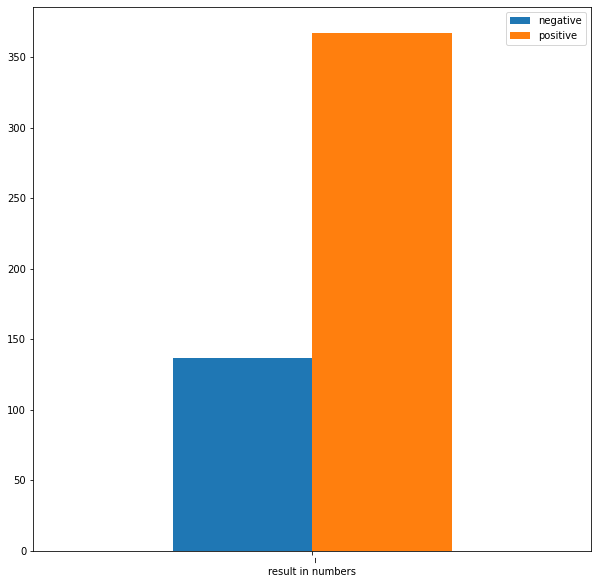

In [140]:
#plot in total amounts. Remember, 0 = negative, 1 = positive
import matplotlib.pyplot as plt
count0 = (testing_pd['pred'] == 0).sum()
count1 = (testing_pd['pred'] == 1).sum()
df_plot=pd.DataFrame({'result in numbers': ['_'], 'negative':[count0], 'positive': [count1]})
df_plot.plot.bar(x='result in numbers', figsize=(10, 10))
plt.show()

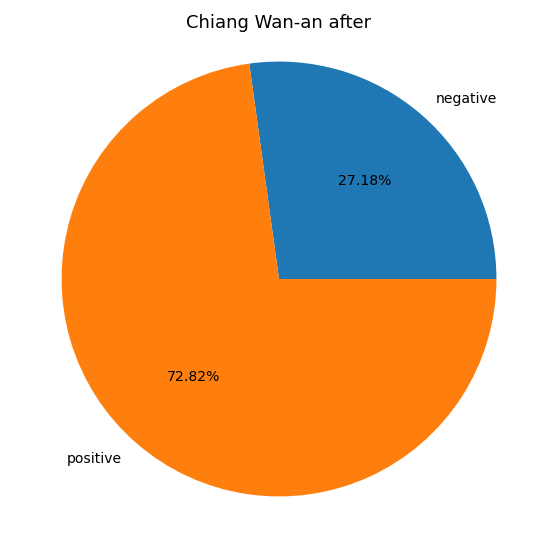

In [141]:
#def Percentage(num1, num2):
#    return num1 / (num1 + num2) * 100
    
#print(Percentage(count0, count1))
#print(Percentage(count1, count0))

def Percentage(num1, num2):
    return num1 / (num1 + num2) * 100

#plot in percentage. Remember, 0 = negative, 1 = positive
per1=Percentage(count0, count1)
per2=Percentage(count1, count0)

label = ['negative', 'positive']
shares = [per1, per2]
fig, ax = plt.subplots(figsize=(10,10))
ax.pie(shares, labels=label, autopct='%.2f%%', shadow=False, labeldistance=1.1,  textprops={'fontsize': 14})
ax.set_title('Chiang Wan-an after', fontsize=18, y=0.95);